In [1]:
!pip -q install pyomo
from pyomo.environ import *
import numpy as np
import pandas as pd


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.4 MB/s eta 0:00:00


1. Create python DataFrame coeffOP1 and coeffOP2 for both (OP1) and (OP2) respectively, containing
the coefficients of the objecive function and constraints.Further, create a Pyomo Framework using these
created DataFrame(s) for both (OP1) and (OP2)

In [38]:
# FIRST METHOD

n=5

c = np.array([1 for i in range(n)])
A1 =np.array([[85 , 92 , 45 , 27 , 31],
             [92 , 54 , 22 , 20 , 7],
             [96 , 67 , 29 , 20 , 11],
             [-91 , -57 ,- 33 , -23 ,- 12],
             [-99 , -75 , -26 , -24 , -41],
             [-98 , -99 , -57 , -45 ,- 65]])


In [3]:
model = ConcreteModel()
model.x = Var(np.arange(n),domain = Reals)
model.u = Var(np.arange(n),domain = Reals)

model.obj = Objective(expr = sum(model.u[i]*c[i] for i in range(n)),sense = minimize)

model.constraints = ConstraintList()

for i in range(6):
  model.constraints.add(expr = sum(A1[i][j]*model.x[j] for j in range(5))>=1)

for i in range(5):
  model.constraints.add(expr = model.u[i]>= model.x[i])
  model.constraints.add(expr = model.u[i]>= -model.x[i])
  model.constraints.add(expr = model.u[i]  >= 0)
model.pprint()



3 Set Declarations
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   21 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21}
    u_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}
    x_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}

2 Var Declarations
    u : Size=5, Index=u_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  None :  None :  None : False :  True :  Reals
          3 :  None :  None :  None : False :  True :  Reals
          4 :  None :  None :  None : False :  True :  Reals
    x : Size=5, Index=x_index
        Key

In [4]:
# installing cbc solver in collab session
!apt-get install -y -qq coinor-cbc
# using solverfactory to solve above constructed pyomo model
optCBC = SolverFactory('cbc')
result = optCBC.solve(model)

print('Solver status:', result.solver.status)
print('Solver termination condition:',result.solver.termination_condition)

Selecting previously unselected package coinor-libcoinutils3v5:amd64.
(Reading database ... 120874 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.11.4+repack1-2_amd64.deb ...
Unpacking coinor-libcoinutils3v5:amd64 (2.11.4+repack1-2) ...
Selecting previously unselected package coinor-libosi1v5:amd64.
Preparing to unpack .../1-coinor-libosi1v5_0.108.6+repack1-2_amd64.deb ...
Unpacking coinor-libosi1v5:amd64 (0.108.6+repack1-2) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.17.5+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.17.5+repack1-1) ...
Selecting previously unselected package coinor-libcgl1:amd64.
Preparing to unpack .../3-coinor-libcgl1_0.60.3+repack1-3_amd64.deb ...
Unpacking coinor-libcgl1:amd64 (0.60.3+repack1-3) ...
Selecting previously unselected package coinor-libcbc3:amd64.
Preparing to unpack .../4-coinor-libcbc3_2.10.7+ds1-1_amd64.deb ...
Unpacking coinor-libcbc3:

In [5]:
def OptResults(Model):
  # display solution
  print('\nObjective = ', Model.Objective())

  print('\nDecision Variables')
  for i in np.arange(5):
    print('x[',i,'] = ', Model.x[i].value)
    print('u[',i,'] = ', Model.u[i].value)
  print('\nConstraints')
  Model.constraints.display()
OptResults(model)


Objective =  <pyomo.core.base.block._generic_component_decorator object at 0x7a80e7797a00>

Decision Variables
x[ 0 ] =  -0.046448575
u[ 0 ] =  0.046448575
x[ 1 ] =  0.18612441
u[ 1 ] =  0.18612441
x[ 2 ] =  -0.17131802
u[ 2 ] =  0.17131802
x[ 3 ] =  0.0
u[ 3 ] =  0.0
x[ 4 ] =  -0.14406472
u[ 4 ] =  0.14406472

Constraints
constraints : Size=21
    Key : Lower : Body               : Upper
      1 :   1.0 : 0.9999996250000001 :  None
      2 :   1.0 : 0.9999997599999997 :  None
      3 :   1.0 :  1.458337769999999 :  None
      4 :   1.0 : 1.0000002550000002 :  None
      5 :   1.0 :  1.000000215000001 :  None
      6 :   1.0 : 5.2549776999999995 :  None
      7 :  None :        -0.09289715 :   0.0
      8 :  None :                0.0 :   0.0
      9 :   0.0 :        0.046448575 :  None
     10 :  None :                0.0 :   0.0
     11 :  None :        -0.37224882 :   0.0
     12 :   0.0 :         0.18612441 :  None
     13 :  None :        -0.34263604 :   0.0
     14 :  None :     

In [6]:
model.obj()

0.547955725

In [7]:
# SECOND METHOD

In [8]:
model1 = ConcreteModel()
model1.a = Var(np.arange(5),domain = NonNegativeReals)
model1.b = Var(np.arange(5),domain = NonNegativeReals)

model1.obj = Objective(expr = sum(model1.a[i]+model1.b[i] for i in range(5) ),sense =minimize)

model1.constraints = ConstraintList()

for i in range(6):
  model1.constraints.add(expr = sum(A1[i][j]*(model1.a[j] - model1.b[j] ) for j in range(5)) >= 1  )
model1.pprint()

3 Set Declarations
    a_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    5 : {0, 1, 2, 3, 4}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {1, 2, 3, 4, 5, 6}

2 Var Declarations
    a : Size=5, Index=a_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :  None : False :  True : NonNegativeReals
          1 :     0 :  None :  None : False :  True : NonNegativeReals
          2 :     0 :  None :  None : False :  True : NonNegativeReals
          3 :     0 :  None :  None : False :  True : NonNegativeReals
          4 :     0 :  None :  None : False :  True : NonNegativeReals
    b : Size=5, Index=b_index
        Key : Lowe

In [9]:
results = optCBC.solve(model1)

print('Solver status:', results.solver.status)
print('Solver termination condition:',results.solver.termination_condition)

Solver status: ok
Solver termination condition: optimal


In [10]:
model1.obj()

0.547955725

In [11]:
for i in range(5):
  print('a[',i,'] = ', model1.a[i].value)
  print('b[',i,'] = ', model1.b[i].value)
  print('x[',i,'] = ', model1.a[i].value - model1.b[i].value)

a[ 0 ] =  0.0
b[ 0 ] =  0.046448575
x[ 0 ] =  -0.046448575
a[ 1 ] =  0.18612441
b[ 1 ] =  0.0
x[ 1 ] =  0.18612441
a[ 2 ] =  0.0
b[ 2 ] =  0.17131802
x[ 2 ] =  -0.17131802
a[ 3 ] =  0.0
b[ 3 ] =  0.0
x[ 3 ] =  0.0
a[ 4 ] =  0.0
b[ 4 ] =  0.14406472
x[ 4 ] =  -0.14406472


Question 1. Best Fit: Minimizing Least Square Estimates

2. Solve the above formulation using the Pyomo/qpsolver framework and report your optimal solution```



In [12]:
df = pd.read_csv('Lab08_InterestRate (2).csv')

In [13]:
df

,Year,Interest Rate,Ratio,Rating
0,2003,0.0416,0.3615,85.6
1,2004,0.0312,0.2820,91.9
2,2005,0.0354,0.3010,89.1
3,2006,0.0331,0.3862,90.4
4,2007,0.0399,0.3578,86.3
5,2008,0.0501,0.4413,74.7
6,2009,0.0421,0.6753,79.8
7,2010,0.0507,0.6777,74.3
8,2011,0.0431,0.6585,84.4
9,2012,0.0437,0.6702,84.1


In [14]:
R = df['Interest Rate'].tolist()
I = np.array(R)
I

array([0.0416, 0.0312, 0.0354, 0.0331, 0.0399, 0.0501, 0.0421, 0.0507,
       0.0431, 0.0437, 0.0398, 0.0274, 0.0298, 0.0261, 0.0358, 0.0504,
       0.0478, 0.0549, 0.0468, 0.0478])

In [15]:
!pip -q install qpsolvers[open_source_solvers]
from qpsolvers import solve_qp


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 459.0/459.0 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 49.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 959.9/959.9 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 46.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.8/452.8 kB 34.2 MB/s eta 0:00:00


In [16]:
L = []
for i in range(20):
  L.append([1,df.iloc[i,2],df.iloc[i,3]])

In [17]:
A = np.array(L)
np.shape(A)

(20, 3)

In [18]:
A_ = np.transpose(A)

In [19]:
P =  np.matmul(A_,A)*2

In [20]:
np.shape(P)

(3, 3)

In [21]:
P

array([[4.00000000e+01, 1.81496000e+01, 3.35400000e+03],
       [1.81496000e+01, 9.25515268e+00, 1.49040692e+03],
       [3.35400000e+03, 1.49040692e+03, 2.83313880e+05]])

In [22]:
q_ = -2*np.matmul(np.transpose(I),A)

In [23]:
q = np.transpose(q_)

In [24]:
q

array([  -1.635     ,   -0.77927632, -134.82612   ])

In [25]:
np.shape(q)

(3,)

In [26]:
l = np.array([0,-np.inf,-np.inf])
u= np.array([np.inf,np.inf,np.inf])

In [27]:
solve_qp(P, q ,None, None, None, None , l, u , solver="osqp")

/usr/local/lib/python3.10/dist-packages/qpsolvers/conversions/ensure_sparse_matrices.py:38: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/osqp/utils.py:122: UserWarning: Converting sparse A to a CSC (compressed sparse column) matrix. (It may take a while...)
  warn("Converting sparse A to a CSC " +


array([ 0.09128332,  0.01686998, -0.00069351])

3. Assume you are interested in minimizing the absolute deviation between actual and predicted interest
rates. How will you modify the above formulation? It is known that such an approach will result in a
non-linear program. Use (OP1) or (OP2) approach to determine decision variables.


Using (OP1)

In [28]:
ratio = np.array(df['Ratio'].tolist())
rating = np.array(df['Rating'].tolist())


In [29]:
modelop1 = ConcreteModel()
modelop1.b = Var(np.arange(3),domain = Reals)
modelop1.u = Var(np.arange(20),domain = Reals)

modelop1.obj = Objective(expr = sum(modelop1.u[i] for i in range(20)),sense = minimize)

modelop1.constraints = ConstraintList()


modelop1.constraints.add(expr =modelop1.b[0] >=0)

for i in range(20):
  modelop1.constraints.add(expr = modelop1.u[i]>= I[i] -modelop1.b[0] - modelop1.b[1]*ratio[i] - modelop1.b[2]*rating[i] )
  modelop1.constraints.add(expr = modelop1.u[i]>= - (I[i] -modelop1.b[0] - modelop1.b[1]*ratio[i] - modelop1.b[2]*rating[i]  ) )
  modelop1.constraints.add(expr = modelop1.u[i]  >= 0)
modelop1.pprint()


3 Set Declarations
    b_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    3 : {0, 1, 2}
    constraints_index : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   61 : {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61}
    u_index : Size=1, Index=None, Ordered=False
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :   20 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

2 Var Declarations
    b : Size=3, Index=b_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :  None :  None : False :  True :  Reals
          1 :  None :  None :  None : False :  True :  Reals
          2 :  

In [30]:
result1 = optCBC.solve(modelop1)

print('Solver status:', result1.solver.status)
print('Solver termination condition:',result1.solver.termination_condition)

Solver status: ok
Solver termination condition: optimal


In [31]:
print('\nObjective = ', modelop1.Objective())

print('\nDecision Variables')
for i in np.arange(3):
  print('b[',i,'] = ', modelop1.b[i].value)
for i in np.arange(20):
  print('u[',i,'] = ', modelop1.u[i].value)
print('\nConstraints')
modelop1.constraints.display()




Objective =  <pyomo.core.base.block._generic_component_decorator object at 0x7a80dd32c3a0>

Decision Variables
b[ 0 ] =  0.11547155
b[ 1 ] =  0.0093102734
b[ 2 ] =  -0.00093012282
u[ 0 ] =  0.0023812986
u[ 1 ] =  0.0014187609
u[ 2 ] =  0.0
u[ 3 ] =  0.0018840756
u[ 4 ] =  0.0013668326
u[ 5 ] =  0.0
u[ 6 ] =  0.0054349776
u[ 7 ] =  0.0019729978
u[ 8 ] =  0.0
u[ 9 ] =  0.00021203295
u[ 10 ] =  0.0020009609
u[ 11 ] =  0.0032214733
u[ 12 ] =  0.0023927122
u[ 13 ] =  0.004939776
u[ 14 ] =  0.0004169394
u[ 15 ] =  0.00067649685
u[ 16 ] =  0.0046027285
u[ 17 ] =  0.001399003
u[ 18 ] =  0.001636583
u[ 19 ] =  0.0019714411

Constraints
constraints : Size=61
    Key : Lower : Body                    : Upper
      1 :   0.0 :              0.11547155 :  None
      2 :  None :   9.578999793889709e-10 :   0.0
      3 :  None :   -0.004762598157899979 :   0.0
      4 :   0.0 :            0.0023812986 :  None
      5 :  None :  -0.0028375208407999987 :   0.0
      6 :  None :  -9.592000008943474e-10 

In [32]:
modelop1.obj()

0.0379290903

4. Plot your given data along with the predicted data using your decision variables from mean square
deviation and absolute deviation.


In [33]:
MSEconstants = solve_qp(P, q ,None, None, None, None , l, u , solver="osqp")
MSDdata = [MSEconstants[0] + MSEconstants[1]*ratio[i]+ MSEconstants[2]*rating[i] for i in range(20)]
MSDdata

[0.03801740022749828,
 0.03230712664476189,
 0.0345694830609893,
 0.03510524261200826,
 0.03746952459904783,
 0.04692287892652262,
 0.04733355457097526,
 0.05118834527128734,
 0.04385999483801497,
 0.044265426443804545,
 0.03663522747444583,
 0.030473421185289104,
 0.031931876942702386,
 0.031528929567609984,
 0.034340419485848976,
 0.04584393663117888,
 0.05040106951957797,
 0.05329525283158571,
 0.044821676045428104,
 0.04543178653346783]

In [34]:
ADdata = [modelop1.b[0].value + modelop1.b[1].value*ratio[i] + modelop1.b[2].value*rating[i] for i in range(20)]

In [35]:
import matplotlib.pyplot as plt
import numpy as np

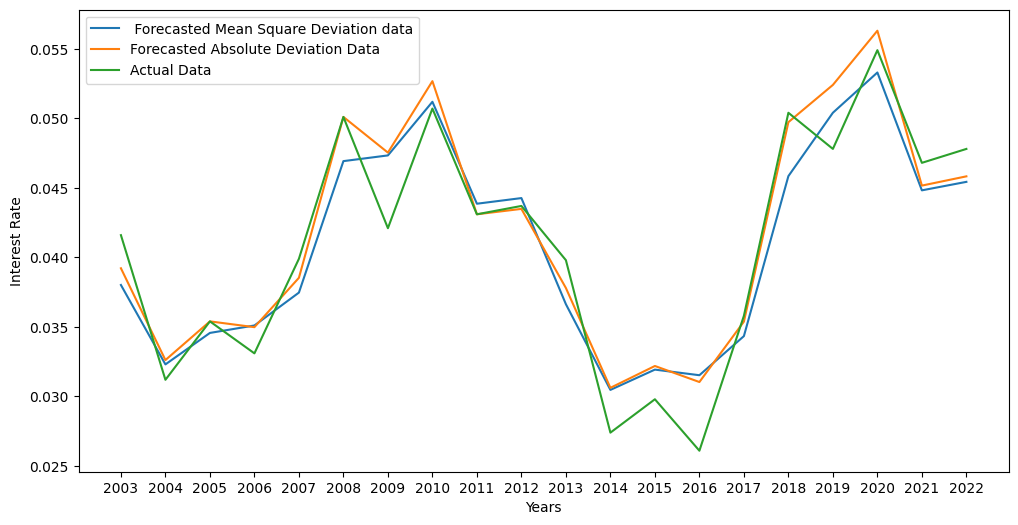

In [36]:
plt.figure(figsize=(12,6))
x=np.linspace(2003,2022,20)

plt.xticks(x)

plt.plot(x,MSDdata, label=' Forecasted Mean Square Deviation data')
plt.plot(x,ADdata, label='Forecasted Absolute Deviation Data')
plt.plot(x,df['Interest Rate'].tolist(), label='Actual Data')
plt.xlabel('Years')
plt.ylabel('Interest Rate')
plt.legend()
plt.show()

# 2

In [40]:
P2 = np.array([[12983, 0, 0, 0],
              [0, 2400, 0, 0],
              [0, 0, 440, -52.42],
              [0, 0, -52.42, 68.7]])

q2 = np.array([-6748000 ,-1184000 ,-420000 ,-70000])

G =  np.array([[-259.66 , -1045.5875 , 6.655 , 9.016],
             [-584.235 , -103.74 , 10.66 , 7.728],
             [6491.5 , 0 , 0 , 0],
             [0 , 1200 , 0 , 0],
             [0 , 220 , 0 , -25.76],
              [0 , 34.35 , -26.66 , 0]])
h = np.array([-781620  ,-35000 ,6748000 ,1184000 ,420000 ,70000])

A = np.array([482, 32, 21, 7])
b = np.array([193949])
lb = np.array([0,0,0,0])


In [41]:
solve_qp(P2, q2, G,h, A, b,lb, ub=None, solver = "osqp")

array([310.17451988, 683.41114087, 769.44684733, 916.76235321])

3A(3). Formulate your optimization problem using the above data to perform quadratic optimization for
Risk Aversion. Explain the significance of λ in the context of portfolio optimization. Also, plot your
trajectory for Pareto-Frontier by assuming λ = 10 5ν
N −1 where ν ∈ {1, 2, · · · N}. Set N = 100


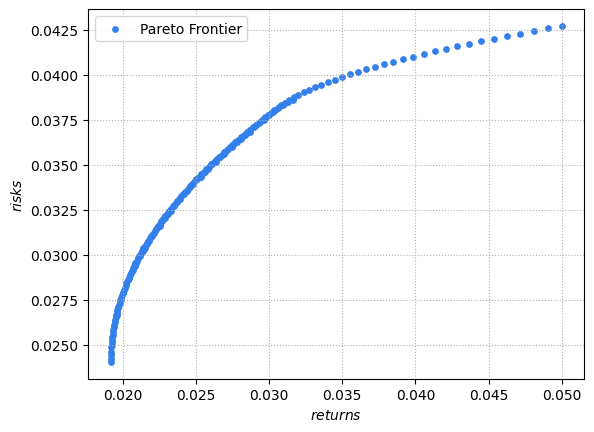

In [42]:
n = 101


samples = []
w1 = np.linspace(0,1,n)
w2 = np.linspace(0,1,n)
for one in w1:
  for two in w2:
    if(one+two <=1):
      samples.append((one,two,1- one -two))


def risk(sample, covariance):
  return 0.5*np.matmul(sample.transpose(), np.matmul(covariance, sample))


Mo= 0.02
M = np.array([0.0427,0.0015,0.0285])
covariance = np.array([[0.1,0.0018, 0.0011],[0.0012,0.1044,0.0026],[0.0011,0.00026,0.1411]])

def preturn(sample, M):
  return np.matmul(sample.transpose(), M)



risks = []
returns = []
allocation = []
for sample in samples:
  w = np.array([sample[0],sample[1],sample[2]])

  if np.matmul(w.transpose(), M) >= Mo:
    allocation.append(w)
    risks.append(risk(w,covariance))
    returns.append(preturn(w,M))

min(risks)
allocation[np.argmin(risks)]
returns[np.argmin(risks)]
paretopoints = []
n = len(allocation)
for i in range(n):
  flag = 0
  for j in range(n):
    if i!=j:
      if ((risks[i] > risks[j]) and (returns[i] <= returns[j])) or ((risks[i] >= risks[j]) and (returns[i] < returns[j])):
        flag = 1
        break
  if flag == 0:
    paretopoints.append(allocation[i])
    returnspareto = [preturn(sample,M) for sample in paretopoints]
riskspareto = [risk(sample, covariance) for sample in paretopoints]


plt.scatter( riskspareto,returnspareto ,color = "#3480eb", s =15)
plt.xlabel("$returns$")
plt.ylabel("$risks$")
plt.grid(linestyle = ":")
plt.legend(labels = ["Pareto Frontier"])


lamda = [10**((v/20)-1) for v in range(1,101)]

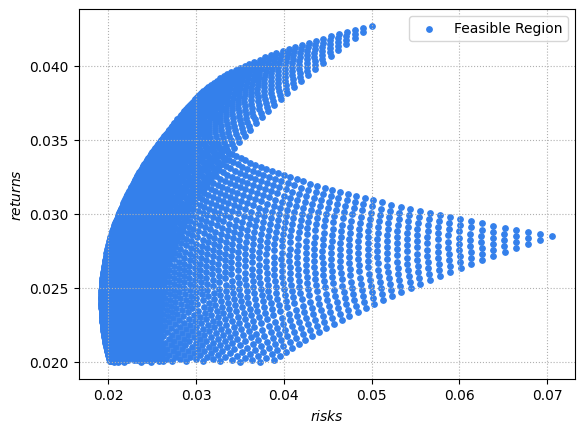

In [43]:
plt.scatter(risks,returns,color = "#3480eb", s =15)
plt.xlabel("$risks$")
plt.ylabel("$returns$")
plt.grid(linestyle = ":")
plt.legend(labels = ["Feasible Region"])